In [1]:
# 패키지 설치

import warnings 
warnings.filterwarnings(action='ignore')
import sys
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sb
from pandas import DataFrame,read_excel, melt, pivot_table, concat, merge
from matplotlib import pyplot as plt
from math import sqrt
from scipy.stats import t, ttest_1samp, normaltest, bartlett, levene, ttest_ind, ttest_rel, mannwhitneyu
from statannotations.Annotator import Annotator


In [2]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

In [4]:
origin = read_excel('C:/Users/Jihwan/01Class/E.추론통계/수업자료/commercial.xlsx')
origin

,quarter,code,type,name,sales_amount,number_of_sales
0,1,3001491,관광특구,이태원 관광특구,72523644100,2496865
1,1,3001492,관광특구,명동 남대문 북창동 다동 무교동 관광특구,283332346393,10246122
2,1,3001493,관광특구,동대문패션타운 관광특구,81696730221,2880324
3,1,3001494,관광특구,종로·청계 관광특구,212062656625,4960006
4,1,3001495,관광특구,잠실 관광특구,231338386876,5995166
...,...,...,...,...,...,...
6217,4,3130323,전통시장,둔촌역전통시장,13523478306,535132
6218,4,3130324,전통시장,길동복조리시장,6236556030,330148
6219,4,3130325,전통시장,명일전통시장,3973269286,186049
6220,4,3130326,전통시장,고덕 골목형상점가,15013907999,755565


In [5]:
origin.dtypes

quarter             int64
code                int64
type               object
name               object
sales_amount        int64
number_of_sales     int64
dtype: object

In [6]:
df_first = origin.query('quarter ==1 or quarter == 2')
empty = df_first.isnull()
empty
empty.sum()
df_second = origin.query('quarter ==3 or quarter == 4')
empty2 = df_second.isnull()
empty2.sum() 
df_second

,quarter,code,type,name,sales_amount,number_of_sales
3110,3,3001491,관광특구,이태원 관광특구,111100141729,4664562
3111,3,3001492,관광특구,명동 남대문 북창동 다동 무교동 관광특구,381870546036,14299112
3112,3,3001493,관광특구,동대문패션타운 관광특구,107515451485,3731289
3113,3,3001494,관광특구,종로·청계 관광특구,256056550028,6544462
3114,3,3001495,관광특구,잠실 관광특구,379405900090,13378661
...,...,...,...,...,...,...
6217,4,3130323,전통시장,둔촌역전통시장,13523478306,535132
6218,4,3130324,전통시장,길동복조리시장,6236556030,330148
6219,4,3130325,전통시장,명일전통시장,3973269286,186049
6220,4,3130326,전통시장,고덕 골목형상점가,15013907999,755565


In [7]:
# 1,2 분기 상권별 매출액 평균

df_first = df_first[['quarter','type','sales_amount','code']]
df_first2 = df_first[['type','sales_amount']]
df_first2 = df_first2.groupby('type').mean()
df_first_tour = df_first.query('type=="관광특구"')
df_first_tour

,quarter,type,sales_amount,code
0,1,관광특구,72523644100,3001491
1,1,관광특구,283332346393,3001492
2,1,관광특구,81696730221,3001493
3,1,관광특구,212062656625,3001494
4,1,관광특구,231338386876,3001495
5,1,관광특구,214898892413,3001496
1555,2,관광특구,111856423038,3001491
1556,2,관광특구,373158679010,3001492
1557,2,관광특구,105081912342,3001493
1558,2,관광특구,264624630438,3001494


In [8]:
# 3,4 분기 상권별 매출액 평균

df_second = df_second[['quarter','type','sales_amount','code']]
df_second2 = df_second[['type','sales_amount']]
df_second2 = df_second2.groupby('type').mean()
df_second


,quarter,type,sales_amount,code
3110,3,관광특구,111100141729,3001491
3111,3,관광특구,381870546036,3001492
3112,3,관광특구,107515451485,3001493
3113,3,관광특구,256056550028,3001494
3114,3,관광특구,379405900090,3001495
...,...,...,...,...
6217,4,전통시장,13523478306,3130323
6218,4,전통시장,6236556030,3130324
6219,4,전통시장,3973269286,3130325
6220,4,전통시장,15013907999,3130326


In [9]:
# data 설정

# 1,2 분기 상권별 매출액 데이터

data_first = df_first.pivot_table(index=df_first.index,
                                  columns='type',
                                  values='sales_amount')

data_first
#empty = data_first.isnull()
#empty.sum()



type,골목상권,관광특구,발달상권,전통시장
0,NaN,7.252364e+10,NaN,NaN
1,NaN,2.833323e+11,NaN,NaN
2,NaN,8.169673e+10,NaN,NaN
3,NaN,2.120627e+11,NaN,NaN
4,NaN,2.313384e+11,NaN,NaN
...,...,...,...,...
3105,NaN,NaN,NaN,1.272406e+10
3106,NaN,NaN,NaN,5.929755e+09
3107,NaN,NaN,NaN,3.622169e+09
3108,NaN,NaN,NaN,1.295238e+10


In [10]:
# data 설정

# 3,4 분기 상권별 매출액 데이터

data_second = df_second.pivot_table(index=df_second.index,
                                  columns='type',
                                  values='sales_amount')
#data_first = data_first.reset_index()
data_second = data_second.rename(columns={'골목상권':'골목상권(하반기)','관광특구':'관광특구(하반기)','발달상권':'발달상권(하반기)','전통시장':'전통시장(하반기)'})
data_second.info()
# empty = data_second.isnull()
# empty.sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 3110 to 6221
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   골목상권(하반기)  2048 non-null   float64
 1   관광특구(하반기)  12 non-null     float64
 2   발달상권(하반기)  498 non-null    float64
 3   전통시장(하반기)  554 non-null    float64
dtypes: float64(4)
memory usage: 121.6 KB


In [11]:
df = concat([data_first,data_second],ignore_index=True)
df = df.rename(columns={'골목상권':'골목상권(상반기)','관광특구':'관광특구(상반기)','발달상권':'발달상권(상반기)','전통시장':'전통시장(상반기)'})
df_tour = df[['관광특구(하반기)']]
df_tour.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   관광특구(하반기)  12 non-null     float64
dtypes: float64(1)
memory usage: 48.7 KB


In [12]:
# 신뢰구간 그리기 위한 데이터프레임 만들기
# |골목상권1,2분기매출액|골목상권3,4분기매출액|관광특구1,2분기...순으로 컬럼 만들기

In [13]:
# 골목상권 데이터프레임 만들기

data_golmok1 = df[['골목상권(상반기)']]
empty_golmok1 = data_golmok1.isnull()
# empty_golmok1.sum()
# data_golmok1.info()
data_golmok2 = data_golmok1.dropna().reset_index(drop=True)
#data_golmok2.info()

data_golmok3 = df[['골목상권(하반기)']]
data_golmok4 = data_golmok3.dropna().reset_index(drop=True)
data_golmok4
data_golmok = merge(data_golmok2,data_golmok4,left_index=True, right_index=True, how="outer")
data_golmok

# 이상치 제거

# 사분위수 구하고 Q1 이하 혹은 Q3 초과인 값 결측치로 변환 후 통계적 값으로 처리

Q1 = data_golmok['골목상권(상반기)'].quantile(0.25)
Q3 = data_golmok['골목상권(상반기)'].quantile(0.75)
iqr = Q3 - Q1

outline_max = Q3 + iqr * 1.5
outline_min = Q1 - iqr * 1.5

data_golmok.loc[data_golmok['골목상권(상반기)'] > outline_max, '골목상권(상반기)'] = np.nan

Q1_1 = data_golmok['골목상권(하반기)'].quantile(0.25)
Q3_1 = data_golmok['골목상권(하반기)'].quantile(0.75)
iqr_1 = Q3_1 - Q1_1

outline_max_1 = Q3_1 + iqr_1 * 1.5
outline_min_1 = Q1_1 - iqr_1 * 1.5

data_golmok.loc[data_golmok['골목상권(하반기)'] > outline_max_1, '골목상권(하반기)'] = np.nan
data_golmok.loc[data_golmok['골목상권(하반기)'] <= outline_min_1, '골목상권(하반기)'] = np.nan

data_golmok


#결측치 정제 

imr = SimpleImputer(missing_values=np.nan,strategy='mean')
imr
df_imr = imr.fit_transform(data_golmok.values)
df_imr
re_data_golmok = DataFrame(df_imr,index=data_golmok.index,columns=data_golmok.columns)
re_data_golmok1 = re_data_golmok.sort_values(['골목상권(하반기)'])
# re_data_golmok2 = re_data_golmok1.sort_values('골목상권(하반기)')
# re_data_golmok2
re_data_golmok2 = re_data_golmok1.reset_index(drop=True)







In [14]:
#log 데이터로 변환
log_data_golmok_first = DataFrame(np.log(re_data_golmok2['골목상권(상반기)']))
log_data_golmok_second = DataFrame(np.log(re_data_golmok2['골목상권(하반기)']))
log_data_golmok = merge(log_data_golmok_first,log_data_golmok_second,left_index=True, right_index=True, how="outer")
log_data_golmok

# 이상치 결측치로 변경

log_Q1_first = log_data_golmok['골목상권(상반기)'].quantile(0.25)
log_Q3_first = log_data_golmok['골목상권(상반기)'].quantile(0.75)
log_iqr_first = log_Q3_first - log_Q1_first

log_outline_max_first = log_Q3_first + log_iqr_first * 1.5
log_outline_min_first = log_Q1_first - log_iqr_first * 1.5

log_data_golmok.loc[log_data_golmok['골목상권(상반기)'] > log_outline_max_first, '골목상권(상반기)'] = np.nan
log_data_golmok.loc[log_data_golmok['골목상권(상반기)'] <= log_outline_min_first*1.15, '골목상권(상반기)'] = np.nan


log_Q1_second = log_data_golmok['골목상권(하반기)'].quantile(0.25)
log_Q3_second = log_data_golmok['골목상권(하반기)'].quantile(0.75)
log_iqr_second = log_Q3_second - log_Q1_second

log_outline_max_second = log_Q3_second + log_iqr_second * 1.5
log_outline_min_second = log_Q1_second - log_iqr_second * 1.5

log_data_golmok.loc[log_data_golmok['골목상권(하반기)'] > log_outline_max_second, '골목상권(하반기)'] = np.nan
log_data_golmok.loc[log_data_golmok['골목상권(하반기)'] <= log_outline_min_second*1.15, '골목상권(하반기)'] = np.nan

log_data_golmok

# 결측치 통계값으로 대체

imr = SimpleImputer(missing_values=np.nan,strategy='mean')
imr
log_df_imr = imr.fit_transform(log_data_golmok.values)
log_df_imr
re_log_data_golmok = DataFrame(log_df_imr,index=log_data_golmok.index,columns=log_data_golmok.columns)
re_log_data_golmok


,골목상권(상반기),골목상권(하반기)
0,21.110103,21.862584
1,21.742455,21.862584
2,21.742455,21.862584
3,21.742455,21.862584
4,22.198963,21.862584
...,...,...
2043,21.649202,23.139513
2044,23.008185,23.142167
2045,21.742455,23.142384
2046,22.913136,23.146871


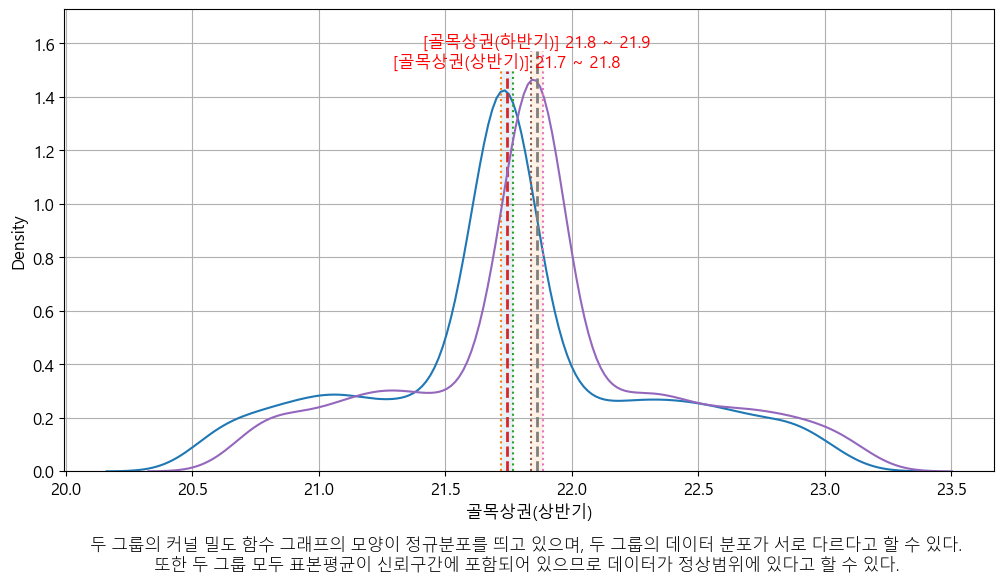

In [15]:
# 골목상권 신뢰구간

plt.figure()

for c in re_log_data_golmok.columns:
    #print(c)

    data = re_log_data_golmok[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

In [16]:
# 정규성 검정

for c in re_log_data_golmok.columns:
    s, p = normaltest(re_log_data_golmok[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p > 0.05))

[골목상권(상반기)] statistic: 3.661, p-value: 0.160, 정규성 충족 여부: True
[골목상권(하반기)] statistic: 5.528, p-value: 0.063, 정규성 충족 여부: True


In [17]:
# 등분산성 검정

normal_dist = True      # 정규성 만족 여부
data = re_log_data_golmok.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p >= 0.05))

Bartlett 검정: statistic: 1.271, p-value: 0.260, 등분산성 충족 여부: True


In [18]:
# 정규성, 등분산성 만족하므로 가설 설정
# 귀무가설: 골목상권의 2023년 상반기와 하반기의 매출액의 차이는 없다.
# 대립가설: 골목상권의 2023년 상반기와 하반기의 매출액의 차이는 있다.

In [19]:
s, p = ttest_ind(re_log_data_golmok['골목상권(상반기)'], re_log_data_golmok['골목상권(하반기)'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -7.073, p-value: 0.000, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 `-7.073`이고 이에 대응되는 유의확률이 `0.000`이므로($p < 0.05$) 귀무가설을 기각하고 대립가설을 채택한다.
> 
> 즉, 골목상권의 2023년 상반기와 하반기의 매출액은 차이가 있다고 결론 내릴 수 있다.

In [20]:
# 상반기가 하반기보다 매출액이 크다는 대립가설 검증
# 귀무가설: 골목상권의 2023년 상반기가 하반기보다 매출액이 크지 않다.
# 대립가설: 골목상권의 2023년 상반기가 하반기보다 매출액이 크다.

In [21]:
s, p = ttest_ind(re_log_data_golmok['골목상권(상반기)'], re_log_data_golmok['골목상권(하반기)'], alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -7.073, p-value: 1.000, 귀무가설 채택'

> 차이값에 대한 t 통계량의 값이 `-7.073`이고 이에 대응되는 유의확률이 `1.000`이므로($p > 0.05$) 대립가설을 기각하고 귀무가설을 채택한다.
> 
> 즉, 골목상권의 2023년 상반기의 매출액이 하반기의 매출액보다 크지 않다고 결론 내릴 수 있다.

In [22]:
# 상반기가 하반기보다 매출액이 작다는 대립가설 검증
# 귀무가설: 골목상권의 2023년 상반기가 하반기보다 매출액이 적지 않다.
# 대립가설: 골목상권의 2023년 상반기가 하반기보다 매출액이 적다.

In [23]:
s, p = ttest_ind(re_log_data_golmok['골목상권(상반기)'], re_log_data_golmok['골목상권(하반기)'], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -7.073, p-value: 0.000, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 `-7.073`이고 이에 대응되는 유의확률이 `0.000`이므로($p < 0.05$) 귀무가설을 기각하고 대립가설을 채택한다.
> 
> 즉, 골목상권의 2023년 상반기의 매출액이 하반기의 매출액보다 적다고 결론 내릴 수 있다.

In [24]:
# 시각화

data_golmok_box = melt(re_log_data_golmok, var_name='group', value_name='value')
data_golmok_box

,group,value
0,골목상권(상반기),21.110103
1,골목상권(상반기),21.742455
2,골목상권(상반기),21.742455
3,골목상권(상반기),21.742455
4,골목상권(상반기),22.198963
...,...,...
4091,골목상권(하반기),23.139513
4092,골목상권(하반기),23.142167
4093,골목상권(하반기),23.142384
4094,골목상권(하반기),23.146871


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

골목상권(상반기) vs. 골목상권(하반기): t-test independent samples, P_val:1.778e-12 t=-7.073e+00


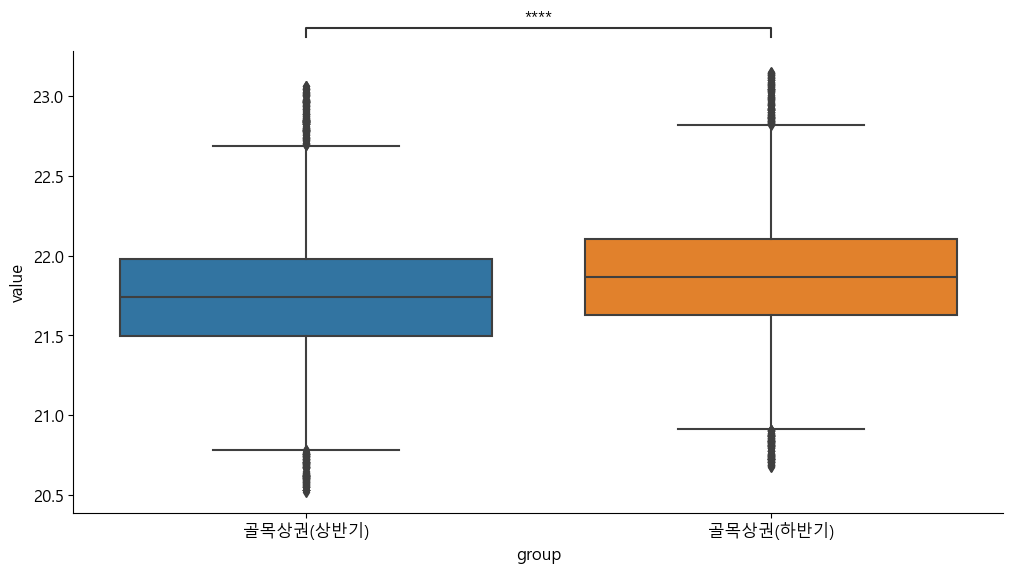

In [25]:
config = {
    "data": data_golmok_box,
    "x": "group",
    "y": "value",
    "pairs": [("골목상권(상반기)", "골목상권(하반기)")],
    "test": "t-test_ind",
    "text_format": "star",
    "loc": "outside"
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

In [26]:
# 관광특구 데이터프레임 만들기

data_tour1 = df[['관광특구(상반기)']]
#data_tour1.info()
empty_tour1 = data_tour1.isnull()
#empty_tour1.sum()
#data_tour1.info()
data_tour2 = data_tour1.dropna().reset_index(drop=True)
data_tour2


data_tour3 = df[['관광특구(하반기)']]
data_tour4 = data_tour3.dropna().reset_index(drop=True)
data_tour4
data_tour = merge(data_tour2,data_tour4,left_index=True, right_index=True, how="outer")
data_tour



type,관광특구(상반기),관광특구(하반기)
0,7.252364e+10,1.111001e+11
1,2.833323e+11,3.818705e+11
2,8.169673e+10,1.075155e+11
3,2.120627e+11,2.560566e+11
4,2.313384e+11,3.794059e+11
5,2.148989e+11,2.297360e+11
6,1.118564e+11,8.790734e+10
7,3.731587e+11,4.482450e+11
8,1.050819e+11,1.256682e+11
9,2.646246e+11,3.021371e+11


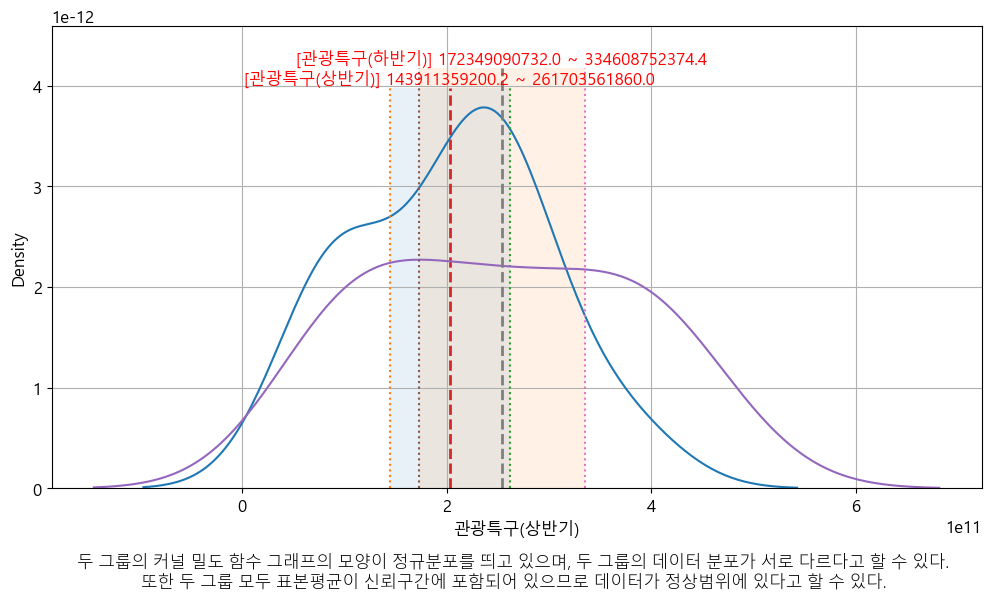

In [27]:
plt.figure()

for c in data_tour.columns:
    #print(c)

    data = data_tour[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

In [28]:
# 정규성 검정

for c in data_tour.columns:
    s, p = normaltest(data_tour[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p >= 0.05))

[관광특구(상반기)] statistic: 0.196, p-value: 0.907, 정규성 충족 여부: True
[관광특구(하반기)] statistic: 2.817, p-value: 0.244, 정규성 충족 여부: True


In [29]:
# 등분산성 검정

normal_dist = True      # 정규성 만족 여부
data = data_tour.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p >= 0.05))

Bartlett 검정: statistic: 1.061, p-value: 0.303, 등분산성 충족 여부: True


In [30]:
# 정규성, 등분산성 만족하므로 가설 설정
# 귀무가설: 관광특구의 2023년 상반기와 하반기의 매출액의 차이는 없다.
# 대립가설: 관광특구의 2023년 상반기와 하반기의 매출액의 차이는 있다.

In [31]:
s, p = ttest_ind(data_tour['관광특구(상반기)'], data_tour['관광특구(하반기)'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -1.112, p-value: 0.278, 귀무가설 채택'

> `p-value`가 `0.05`보다 크므로($P > 0.05$) 귀무가설을 기각할 수 없다. 즉, 두 그룹의 매출액이 다르다고 판단할 근거가 없다.

In [32]:
# 시각화

data_tour_box = melt(data_tour, var_name='group', value_name='value')
data_tour_box

,group,value
0,관광특구(상반기),7.252364e+10
1,관광특구(상반기),2.833323e+11
2,관광특구(상반기),8.169673e+10
3,관광특구(상반기),2.120627e+11
4,관광특구(상반기),2.313384e+11
5,관광특구(상반기),2.148989e+11
6,관광특구(상반기),1.118564e+11
7,관광특구(상반기),3.731587e+11
8,관광특구(상반기),1.050819e+11
9,관광특구(상반기),2.646246e+11


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

관광특구(상반기) vs. 관광특구(하반기): t-test independent samples, P_val:2.780e-01 t=-1.112e+00


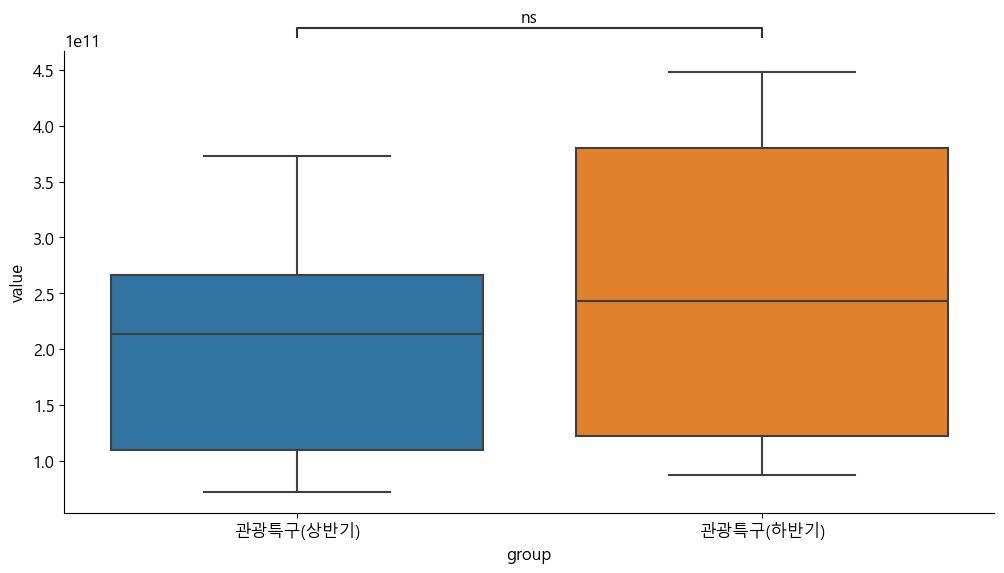

In [33]:
config = {
    "data": data_tour_box,
    "x": "group",
    "y": "value",
    "pairs": [("관광특구(상반기)", "관광특구(하반기)")],
    "test": "t-test_ind",
    "text_format": "star",
    "loc": "outside"
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

In [34]:
# 발달상권 데이터프레임 만들기

data_develop_first = df[['발달상권(상반기)']]

data_develop_first1 = data_develop_first.dropna().reset_index(drop=True)
data_develop_first1


data_develop_second = df[['발달상권(하반기)']]

data_develop_second1 = data_develop_second.dropna().reset_index(drop=True)
data_develop_first1
data_develop = merge(data_develop_first1,data_develop_second1,left_index=True, right_index=True, how="outer")
data_develop



type,발달상권(상반기),발달상권(하반기)
0,1.598919e+10,2.029399e+10
1,1.828332e+10,2.520349e+10
2,4.688986e+10,6.739701e+10
3,1.619067e+10,2.193272e+10
4,1.378309e+10,2.007669e+10
...,...,...
493,4.212269e+10,4.760742e+10
494,5.318481e+10,5.777846e+10
495,2.386332e+10,2.363938e+10
496,4.120617e+10,4.325111e+10


In [35]:
# 로그데이터로 변경 

log_data_develop_first = DataFrame(np.log(data_develop['발달상권(상반기)']))
log_data_develop_second = DataFrame(np.log(data_develop['발달상권(하반기)']))
log_data_develop = merge(log_data_develop_first,log_data_develop_second,left_index=True, right_index=True, how="outer")
log_data_develop

,발달상권(상반기),발달상권(하반기)
0,23.495179,23.733591
1,23.629255,23.950248
2,24.571067,24.933866
3,23.507701,23.811246
4,23.346708,23.722825
...,...,...
493,24.463852,24.586254
494,24.697039,24.779882
495,23.895608,23.886180
496,24.441854,24.490289


In [36]:
# 이상치 결측치로 변환 후 통계치로 변환

Q1_develop_first = log_data_develop_first['발달상권(상반기)'].quantile(0.25)
Q3_develop_first = log_data_develop_first['발달상권(상반기)'].quantile(0.75)
iqr_develop_first = Q3_develop_first - Q1_develop_first

outline_max_develop_first = Q3_develop_first + iqr_develop_first * 1.5
outline_min_develop_first = Q1_develop_first - iqr_develop_first * 1.5

log_data_develop.loc[log_data_develop['발달상권(상반기)'] > outline_max_develop_first, '발달상권(상반기)'] = np.nan
log_data_develop.loc[log_data_develop['발달상권(상반기)'] <= outline_min_develop_first, '발달상권(상반기)'] = np.nan


Q1_develop_second = log_data_develop_second['발달상권(하반기)'].quantile(0.25)
Q3_develop_second = log_data_develop_second['발달상권(하반기)'].quantile(0.75)
iqr_develop_second = Q3_develop_second - Q1_develop_second

outline_max_develop_second = Q3_develop_second + iqr_develop_second * 1.5
outline_min_develop_second = Q1_develop_second - iqr_develop_second * 1.5

log_data_develop.loc[log_data_develop['발달상권(하반기)'] > outline_max_develop_second, '발달상권(하반기)'] = np.nan
log_data_develop.loc[log_data_develop['발달상권(하반기)'] <= outline_min_develop_second, '발달상권(하반기)'] = np.nan

log_data_develop


#결측치 정제 

imr = SimpleImputer(missing_values=np.nan,strategy='mean')
imr
df_imr_develop = imr.fit_transform(log_data_develop.values)
df_imr_develop
re_data_develop = DataFrame(df_imr_develop,index=log_data_develop.index,columns=log_data_develop.columns)
re_data_develop

,발달상권(상반기),발달상권(하반기)
0,23.495179,23.733591
1,23.629255,23.950248
2,24.571067,24.933866
3,23.507701,23.811246
4,23.346708,23.722825
...,...,...
493,24.463852,24.586254
494,24.697039,24.779882
495,23.895608,23.886180
496,24.441854,24.490289


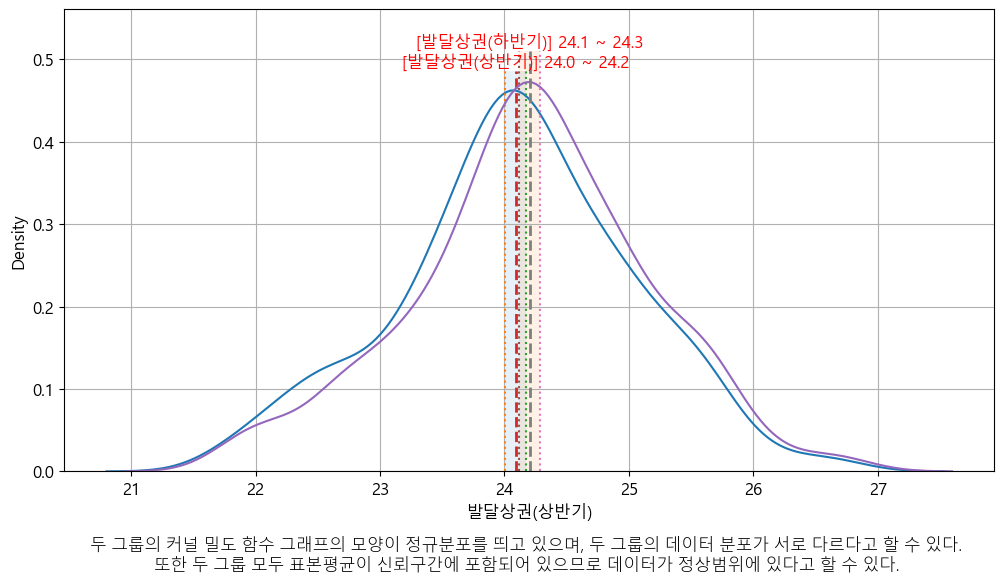

In [37]:
# 신뢰구간

plt.figure()

for c in re_data_develop.columns:
    #print(c)

    data = re_data_develop[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

In [38]:
# 정규성 검정

for c in re_data_develop.columns:
    s, p = normaltest(re_data_develop[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p >= 0.05))

[발달상권(상반기)] statistic: 0.864, p-value: 0.649, 정규성 충족 여부: True
[발달상권(하반기)] statistic: 1.809, p-value: 0.405, 정규성 충족 여부: True


In [39]:
# 등분산성 검정

normal_dist = True      # 정규성 만족 여부
data = re_data_develop.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p >= 0.05))

Bartlett 검정: statistic: 0.010, p-value: 0.919, 등분산성 충족 여부: True


In [40]:
# 정규성, 등분산성 만족하므로 가설 설정
# 귀무가설: 발달상권의 2023년 상반기와 하반기의 매출액의 차이는 없다.
# 대립가설: 발달상권의 2023년 상반기와 하반기의 매출액의 차이는 있다.

In [41]:
s, p = ttest_ind(re_data_develop['발달상권(상반기)'], re_data_develop['발달상권(하반기)'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -1.845, p-value: 0.065, 귀무가설 채택'

> t 통계량의 값이 `-1.845`이고 이에 대응되는 유의확률이 `0.065`이므로($p > 0.05$) 대립가설을 기각하고 귀무가설을 채택한다.
> 
> 즉, 발달상권의 2023년 상반기의 매출액과 하반기의 매출액의 차이가 없다고 결론 내릴 수 있다.

In [42]:
# 시각화

data_develop_box = melt(re_data_develop, var_name='group', value_name='value')
data_develop_box

,group,value
0,발달상권(상반기),23.495179
1,발달상권(상반기),23.629255
2,발달상권(상반기),24.571067
3,발달상권(상반기),23.507701
4,발달상권(상반기),23.346708
...,...,...
991,발달상권(하반기),24.586254
992,발달상권(하반기),24.779882
993,발달상권(하반기),23.886180
994,발달상권(하반기),24.490289


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

발달상권(상반기) vs. 발달상권(하반기): t-test independent samples, P_val:6.538e-02 t=-1.845e+00


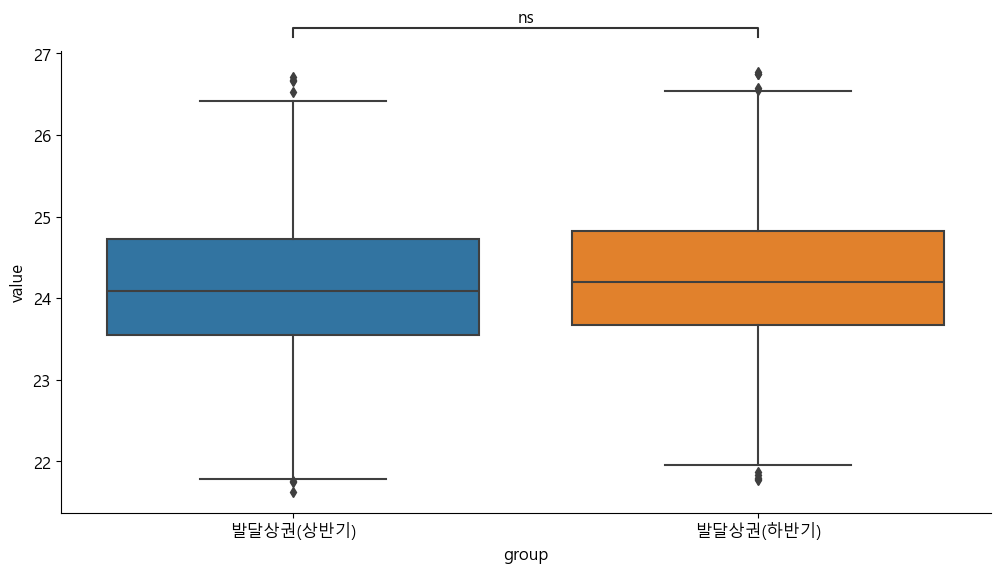

In [43]:
config = {
    "data": data_develop_box,
    "x": "group",
    "y": "value",
    "pairs": [("발달상권(상반기)", "발달상권(하반기)")],
    "test": "t-test_ind",
    "text_format": "star",
    "loc": "outside"
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()

In [44]:
# 전통시장 데이터프레임 생성


data_trad_first = df[['전통시장(상반기)']]

data_trad_first1 = data_trad_first.dropna().reset_index(drop=True)
data_trad_first1


data_trad_second = df[['전통시장(하반기)']]

data_trad_second1 = data_trad_second.dropna().reset_index(drop=True)
data_trad_second1
data_trad = merge(data_trad_first1,data_trad_second1,left_index=True, right_index=True, how="outer")
data_trad1=data_trad.dropna()
data_trad1


type,전통시장(상반기),전통시장(하반기)
0,7.909113e+09,8.251614e+09
1,1.022167e+10,1.599671e+10
2,2.218221e+09,2.637440e+09
3,3.126405e+09,4.380133e+09
4,1.570955e+10,1.985215e+10
...,...,...
549,8.775251e+08,1.352348e+10
550,1.272406e+10,6.236556e+09
551,5.929755e+09,3.973269e+09
552,3.622169e+09,1.501391e+10


In [45]:
# 데이터 로그로 변환

log_data_trad_first = DataFrame(np.log(data_trad1['전통시장(상반기)']))
log_data_trad_second = DataFrame(np.log(data_trad1['전통시장(하반기)']))
log_data_trad = merge(log_data_trad_first,log_data_trad_second,left_index=True, right_index=True, how="outer")
log_data_trad

,전통시장(상반기),전통시장(하반기)
0,22.791282,22.833675
1,23.047776,23.495649
2,21.519972,21.693074
3,21.863150,22.200345
4,23.477534,23.711578
...,...,...
549,20.592616,23.327693
550,23.266761,22.553694
551,22.503249,22.102855
552,22.010339,23.432243


In [46]:
# 이상치 결측치로 변환 후 통계처리


Q1_trad_first = log_data_trad_first['전통시장(상반기)'].quantile(0.25)
Q3_trad_first = log_data_trad_first['전통시장(상반기)'].quantile(0.75)
iqr_trad_first = Q3_trad_first - Q1_trad_first

outline_max_trad_first = Q3_trad_first + iqr_trad_first * 1.5
outline_min_trad_first = Q1_trad_first - iqr_trad_first * 1.5

log_data_trad.loc[log_data_trad['전통시장(상반기)'] > outline_max_trad_first, '전통시장(상반기)'] = np.nan
log_data_trad.loc[log_data_trad['전통시장(상반기)'] <= outline_min_trad_first*1.15, '전통시장(상반기)'] = np.nan


Q1_trad_second = log_data_trad_second['전통시장(하반기)'].quantile(0.25)
Q3_trad_second = log_data_trad_second['전통시장(하반기)'].quantile(0.75)
iqr_trad_second = Q3_trad_second - Q1_trad_second

outline_max_trad_second = Q3_trad_second + iqr_trad_second * 1.5
outline_min_trad_second = Q1_trad_second - iqr_trad_second * 1.5

log_data_trad.loc[log_data_trad['전통시장(하반기)'] > outline_max_trad_second, '전통시장(하반기)'] = np.nan
log_data_trad.loc[log_data_trad['전통시장(하반기)'] <= outline_min_trad_second*1.15, '전통시장(하반기)'] = np.nan

log_data_trad


# #결측치 정제 

imr = SimpleImputer(missing_values=np.nan,strategy='mean')
imr
df_imr_trad = imr.fit_transform(log_data_trad.values)
df_imr_trad
re_data_trad = DataFrame(df_imr_trad,index=log_data_trad.index,columns=log_data_trad.columns)
re_data_trad

,전통시장(상반기),전통시장(하반기)
0,22.791282,22.833675
1,23.047776,23.495649
2,21.519972,21.693074
3,21.863150,22.200345
4,23.477534,23.711578
...,...,...
549,20.592616,23.327693
550,23.266761,22.553694
551,22.503249,22.102855
552,22.010339,23.432243


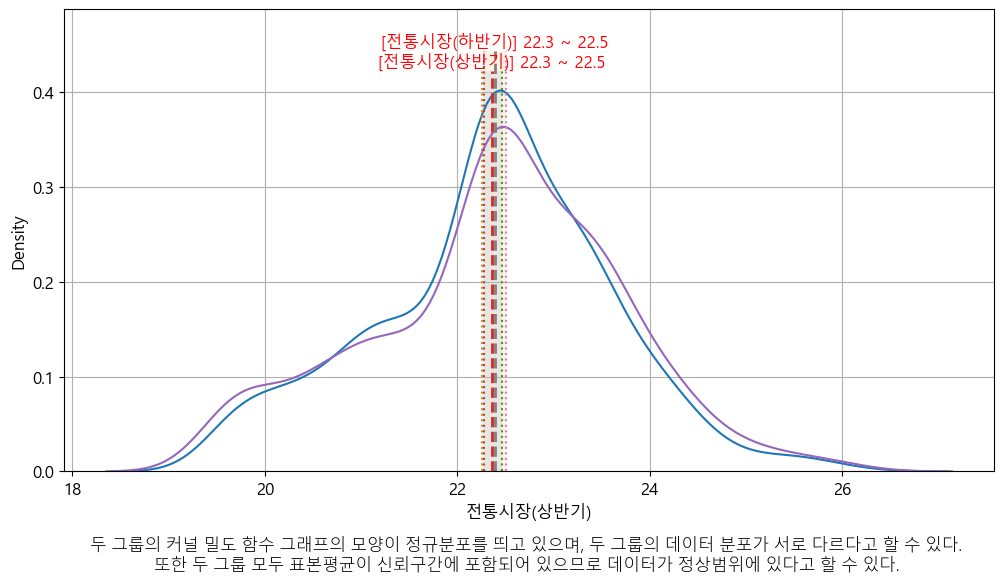

In [47]:
# 신뢰구간


plt.figure()

for c in re_data_trad.columns:
    #print(c)

    data = re_data_trad[c]                                # 데이터만 추출
    max = data.max()                                # 최대값
    clevel = 0.95                                   # 신뢰수준
    dof = len(data) - 1                             # 자유도
    sample_mean = data.mean()                       # 표본평균
    sample_std = data.std(ddof=1)                   # 표본표준편차
    sample_std_error = sample_std / sqrt(len(data)) # 표본표준오차

    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

    sb.kdeplot(data=data)

    xmin, xmax, ymin, ymax = plt.axis()

    # 신뢰구간 그리기
    plt.plot([cmin, cmin], [0, ymax], linestyle=':')
    plt.plot([cmax, cmax], [0, ymax], linestyle=':')
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

    # 평균 그리기
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle='--', linewidth=2)

    plt.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 12, "color": "red"})

txt = """두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다."""

plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 12, "weight": "light"})

plt.ylim(0, ymax*1.1)
plt.grid()
plt.show()
plt.close()

In [48]:
# 정규성 검정

for c in re_data_trad.columns:
    s, p = normaltest(re_data_trad[c])
    print("[{0}] statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}".format(c, s, p, p >= 0.05))

[전통시장(상반기)] statistic: 2.253, p-value: 0.324, 정규성 충족 여부: True
[전통시장(하반기)] statistic: 4.142, p-value: 0.126, 정규성 충족 여부: True


In [49]:
# 등분산성 검정

normal_dist = True      # 정규성 만족 여부
data = re_data_trad.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 등분산성 충족 여부: {3}".format(n, s, p, p >= 0.05))

Bartlett 검정: statistic: 2.792, p-value: 0.095, 등분산성 충족 여부: True


In [50]:
# 정규성, 등분산성 만족하므로 가설 설정
# 귀무가설: 전통시장의 2023년 상반기와 하반기의 매출액의 차이는 없다.
# 대립가설: 전통시장의 2023년 상반기와 하반기의 매출액의 차이는 있다.

In [51]:
s, p = ttest_ind(re_data_trad['전통시장(상반기)'], re_data_trad['전통시장(하반기)'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -0.432, p-value: 0.666, 귀무가설 채택'

> t 통계량의 값이 `-0.432`이고 이에 대응되는 유의확률이 `0.666`이므로($p > 0.05$) 대립가설을 기각하고 귀무가설을 채택한다.
> 
> 즉, 전통시장의 2023년 상반기의 매출액과 하반기의 매출액의 차이가 없다고 결론 내릴 수 있다.

In [52]:
# 시각화

data_trad_box = melt(re_data_trad, var_name='group', value_name='value')
data_trad_box

,group,value
0,전통시장(상반기),22.791282
1,전통시장(상반기),23.047776
2,전통시장(상반기),21.519972
3,전통시장(상반기),21.863150
4,전통시장(상반기),23.477534
...,...,...
1103,전통시장(하반기),23.327693
1104,전통시장(하반기),22.553694
1105,전통시장(하반기),22.102855
1106,전통시장(하반기),23.432243


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

전통시장(상반기) vs. 전통시장(하반기): t-test independent samples, P_val:6.661e-01 t=-4.316e-01


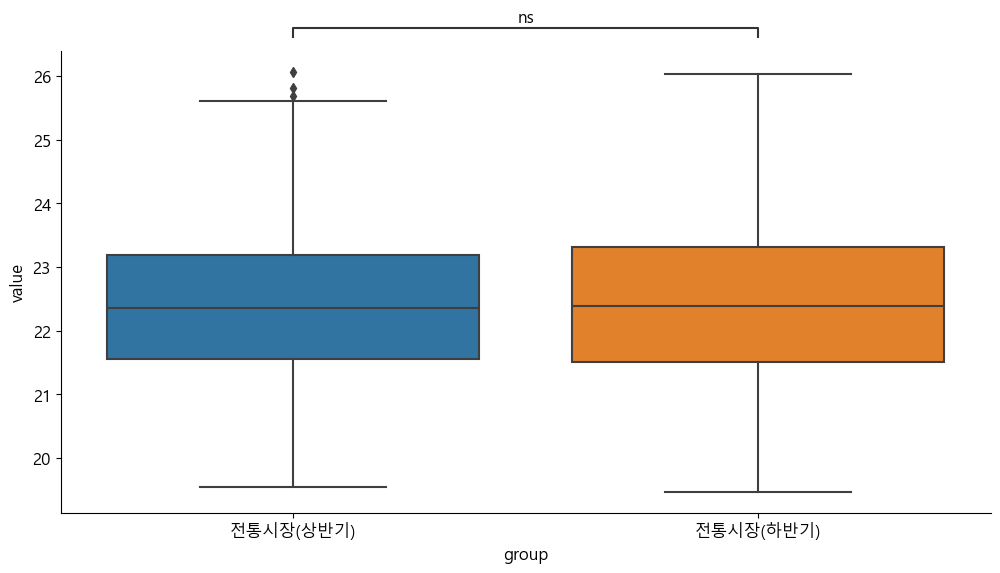

In [53]:
config = {
    "data": data_trad_box,
    "x": "group",
    "y": "value",
    "pairs": [("전통시장(상반기)", "전통시장(하반기)")],
    "test": "t-test_ind",
    "text_format": "star",
    "loc": "outside"
}

plt.figure()
ax = sb.boxplot(data=config['data'], x=config['x'], y=config['y'])
ax.get_xaxis().axis_name

annotator = Annotator(ax, data=config['data'], x=config['x'], y=config['y'], pairs=config['pairs'])
annotator.configure(test=config['test'], text_format=config['text_format'], loc=config['loc'])
annotator.apply_and_annotate()

sb.despine()
plt.show()
plt.close()